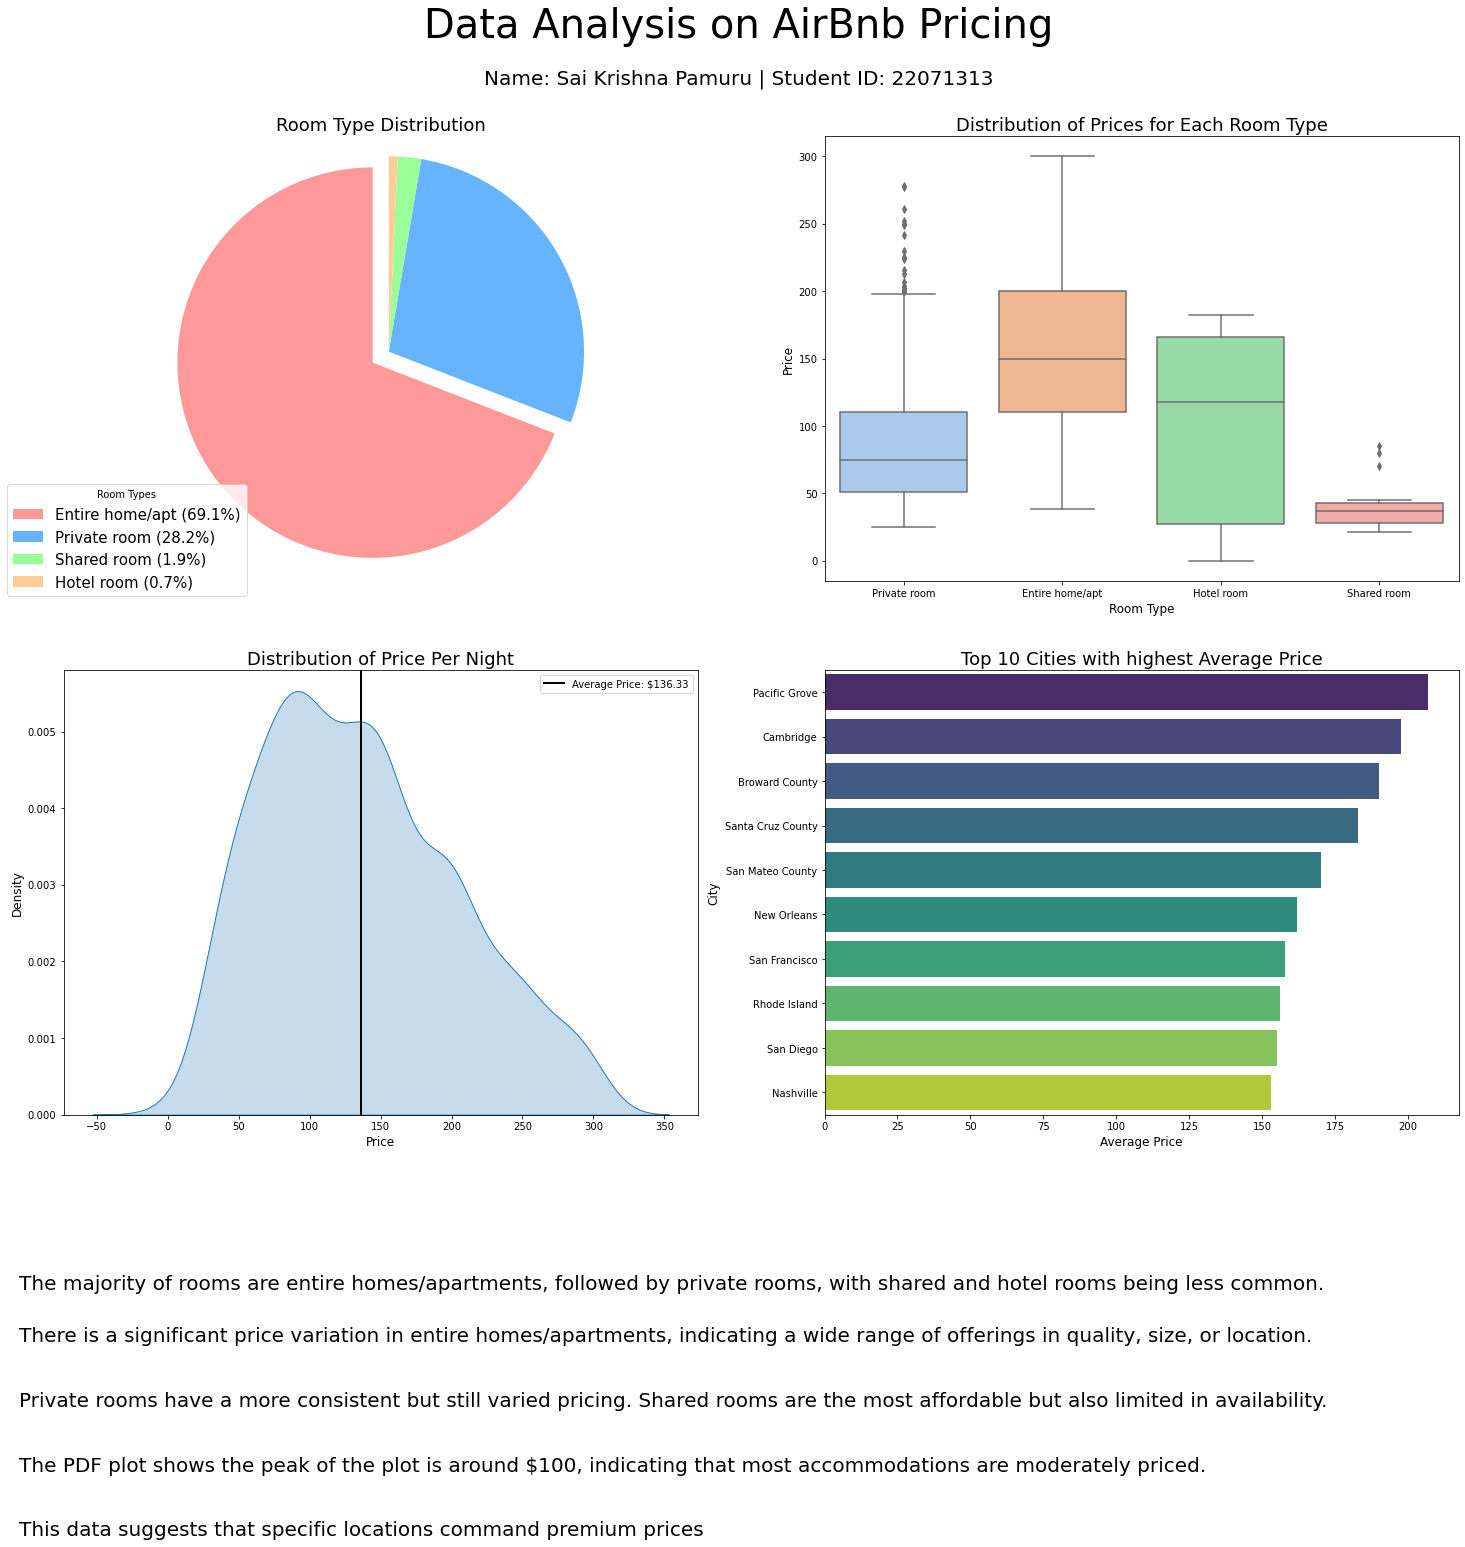

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# https://www.kaggle.com/datasets/kritikseth/us-airbnb-open-data

df = pd.read_csv('AB_US_2023.csv', low_memory=False)
df = df.sample(1000)
df = df[df['price'] <= 300]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25, 18), facecolor='white')

plt.suptitle("Data Analysis on AirBnb Pricing", fontsize=40)
plt.figtext(0.5, 0.92, 'Name: Sai Krishna Pamuru | Student ID: 22071313', ha='center', fontsize=20)

explode = (0.1, 0, 0, 0)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
wedges, _ = ax1.pie(df['room_type'].value_counts(), labels=None, autopct=None, startangle=90, explode=explode, colors=colors)
percentages = [f"{(count / sum(df['room_type'].value_counts()) * 100):.1f}%" for count in df['room_type'].value_counts()]
ax1.legend(wedges, [f"{room_type} ({percentage})" for room_type, percentage in zip(df['room_type'].value_counts().index, percentages)],
           title="Room Types", loc="lower center", bbox_to_anchor=(0.1, -0.05), prop={'size': 15})  # Adjusted bbox_to_anchor parameters
ax1.axis('equal')  
ax1.set_title("Room Type Distribution", fontsize=18)

sns.boxplot(data=df, x='room_type', y='price', palette='pastel', ax=ax2)
ax2.set_xlabel("Room Type", fontsize=12)
ax2.set_ylabel("Price", fontsize=12)
ax2.set_title("Distribution of Prices for Each Room Type", fontsize=18)

sns.kdeplot(data=df, x='price', fill=True, palette='viridis', ax=ax3)
average_price = df['price'].mean()
ax3.axvline(average_price, color='black', linewidth=2, label=f'Average Price: ${average_price:.2f}')
ax3.set_xlabel("Price", fontsize=12)
ax3.set_ylabel("Density", fontsize=12)
ax3.set_title("Distribution of Price Per Night", fontsize=18)
ax3.legend()

average_price_city = df.groupby('city')['price'].mean().sort_values(ascending=False)
top_cities = average_price_city.head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis', ax=ax4)
ax4.set_xlabel("Average Price", fontsize=12)
ax4.set_ylabel("City", fontsize=12)
ax4.set_title("Top 10 Cities with highest Average Price", fontsize=18)

text1 = "The majority of rooms are entire homes/apartments, followed by private rooms, with shared and hotel rooms being less common."
fig.text(0.1, -0.01, text1, fontsize=20, va='baseline')

text2 = "There is a significant price variation in entire homes/apartments, indicating a wide range of offerings in quality, size, or location."
fig.text(0.1, -0.05, text2, fontsize=20, va='baseline')

text3 = "Private rooms have a more consistent but still varied pricing. Shared rooms are the most affordable but also limited in availability."
fig.text(0.1, -0.10, text3, fontsize=20, va='baseline')

text4 = "The PDF plot shows the peak of the plot is around $100, indicating that most accommodations are moderately priced."
fig.text(0.1, -0.15, text4, fontsize=20, va='baseline')

text5 = "This data suggests that specific locations command premium prices"
fig.text(0.1, -0.2, text5, fontsize=20, va='baseline')

plt.show()